# Построение графиков с помощью matplotlib

[К оглавлению](00_contents.ipynb)

Основная графическая библиотека Python - `matplotlib`. Подпакет `pyplot` в этой библиотеке содержит простые функции для построения графиков, похожие на аналогичные функции в Matlab.

[Введение в pyplot на сайте разработчиков](http://matplotlib.org/users/pyplot_tutorial.html)

## Подключение пакета

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;

Можно использовать следующие способы отображения графиков:

`%matplotlib inline` - в блокноте, в виде статичного изображения

`%matplotlib notebook` - в блокноте, в возможностью масштабирования

`%matplotlib`  - в отдельном окне

## Выбор формата графиков

При необходимости, можно переключить формат, в котором выводятся графики. Векторные форматы позволяют сохранить качество при масштабировании и печати, но требуют больше ресурсов. По умолчанию используется растровый формат png. 

Про отличия векторной и растровой графики можно почитать [тут](https://turbologo.ru/blog/rastr-i-vector/)

In [161]:
%config InlineBackend.figure_format = 'svg' #векторный формат

## Линейные графики и диаграммы рассеяния

Графики в Matplotlib строятся по точкам. Координаты точек хранятся в массивах numpy.

In [180]:
import numpy as np
x = np.linspace(-10, 10, 20)
y = x**2

Для вывода линейных графиков и диаграмм рассеяния используется функция `plot()`

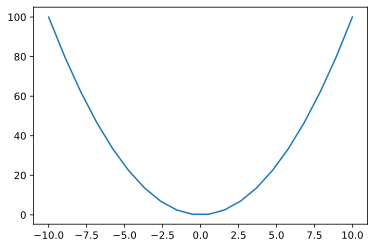

In [163]:
plt.plot(x, y);

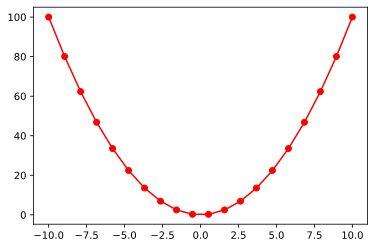

In [5]:
# Сокращенная форма для указания параметров графика
plt.plot(x, y, 'ro-'); #изменение цвета и типа линии и маркера - см. подсказку по Shift-Tab;

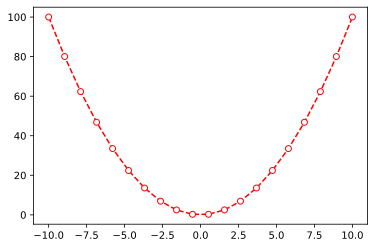

In [182]:
plt.plot(x, y, color='red', marker='o', linestyle='--', markerfacecolor='white');

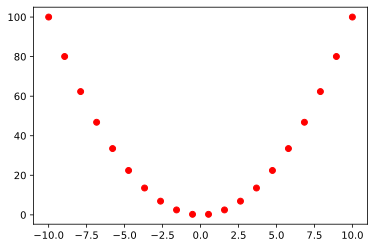

In [184]:
plt.plot(x, y, color='red', marker='o', linestyle='', markerfacecolor='red');

## Оформление графиков
В ячейке блокнота можно несколько раз вызывать функцию `plot()` для нанесения нескольких линий на график. Также можно использовать различные функции для форматирования графика и добавления легенды. 

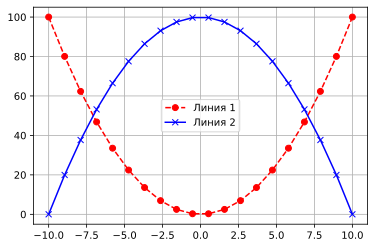

In [165]:
# Полная форма указания параметров графика
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Линия 1')
plt.plot(x, -y + 100, color='blue', marker='x', label='Линия 2')
plt.grid() # сетка
plt.legend(loc='best');

см. также [Примеры размещения легенды графика](http://matplotlib.org/users/legend_guide.html)

С помощью функций `xlabel()`, `ylabel()` можно подписать координатные оси. Заглавие графика можно задать с помощью функции `title()`. 

В названия и аннотации можно включать математические символы и формулы, используя $\LaTeX$. Чтобы не возникало ошибок из-за символов `\`, которые используются как для набора формул, так и для обозначения специальных символов, например `\n`, можно воспользоваться одним из двух способов:

 - добавлять символ `r` перед строкой с формулой, например: `r'$\alpha$'`;
 - экранировать символ `\`, продублировав его: `\\`

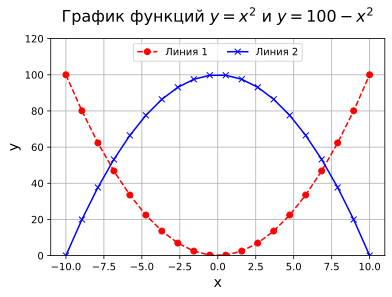

In [167]:
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Линия 1')
plt.plot(x, -y + 100, color='blue', marker='x', label='Линия 2')
plt.legend(loc='upper center', ncol=2)
plt.grid()

#Подписи для осей:
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

#Диапазон оси y:
plt.ylim(0, 120)

#Заголовок:
plt.title(r'График функций $y = x ^2 $ и $y = 100 - x^2$', fontsize=16, y=1.05);

Названия различных элементов графика показаны на рисунке - их можно искать в справке и гуглить, например: [`matplotlib tick label format`](https://www.google.com/search?q=matplotlib+tick+label+format)
![](pics/matplotlib_anatomy.webp)

## Аннотирование графиков

Текстовые пояснения на графиках можно выводить с помощью функции `text()`.
Функция `annotate()` позволяет создавать более сложные аннотации, например, со стрелками, указывающими на определенную область графика.
Горизонтальные и вертикальные опорные линии можно строить с помощью функций `axhline()`, `axvline()`.

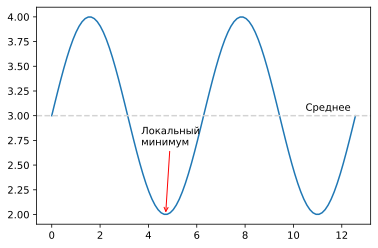

In [12]:
t = np.linspace(0., 4 * np.pi, 101)
f = np.sin(t) + 3
plt.plot(t,f)

plt.axhline(3,color='lightgray',linestyle='--')
plt.text(10.5, 3.05, 'Среднее')
plt.annotate('Локальный\nминимум', xy=(3 * np.pi / 2, 2), 
             xytext=(3.7, 2.7), 
             arrowprops=dict(arrowstyle='->', color='red'));

[Руководство по аннотированию графиков](http://matplotlib.org/users/annotations_guide.html)

## Много графиков

Смысл анализа данных заключается в сопоставлении. Поэтому часто приходится визуализировать несколько зависимостей на одном графике или на расположенных рядом панелях с графиками.

### Несколько графиков в одной системе координат

Построим для сравнения несколько графиков степенных функций в одной системе координат. Используем автоматизацию с помощью цикла.

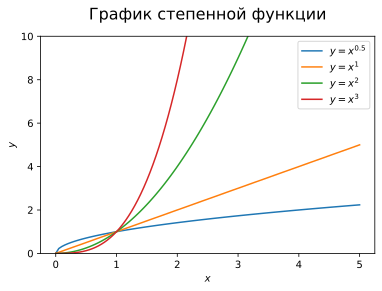

In [171]:
degrees = [0.5, 1, 2, 3] # степени

x = np.linspace(0, 5, num=101) # массив абсцисс

f = lambda x, n: x**n # степенная функция

for n in degrees: # рисуем несколько функций
    plt.plot(x, f(x, n), label=f'$y = x^{{{n}}}$')

plt.legend()
plt.title('График степенной функции', y=1.05, fontsize=16)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.ylim((0, 10)) # Пределы для оси y
plt.show()

### Панель из графиков

В `matplotlib` можно построить панель из графиков, в которой несколько объектов подграфиков `AxesSubplot` "живут" вутри объекта рисунка `Figure`. Мы можем выбрать нужный подграфик по индексу.

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(2,)


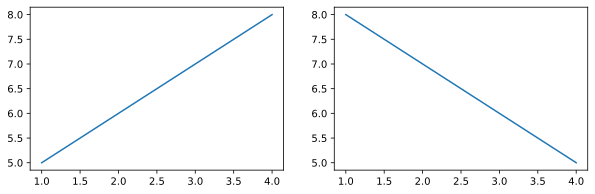

In [190]:
# Пустой рисунок:

fig, ax = plt.subplots(1, 2, # количество подграфиков
                      figsize=(10, 3)) # размер рисунка

print(type(fig)) # Рисунок
print(type(ax)) # Массив подграфиков - координатных осей
print(ax.shape)

ax[0].plot([1, 2, 3, 4], [5, 6, 7, 8]) # рисуем на нужном подграфике
ax[1].plot([1, 2, 3, 4], [8, 7, 6, 5]);

Создав подграфики, можно далее работать с ними также, как и раньше, только вместо `plt.plot()` нужно писать `ax[i, j].plot()`.

На самом деле объекты рисунок и координатные оси создаются всегда, они всегда используются функциями для построения, однако если конкретный график не указан, то используется "текущий" график - который строился последним.

matplotlib.axes._subplots.AxesSubplot

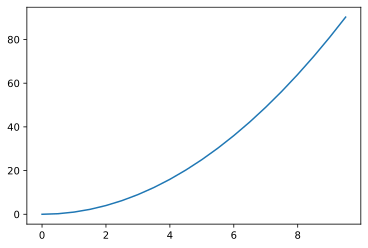

In [191]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)  # на рисунке будет единственный подграфик, выбираем этот подграфик

x = np.arange(0, 10, 0.5)
ax.plot(x, x**2); # Используем ax - ссылку на объект-подграфик - вместо plt

type(ax)

Построим графики степенных функций на отдельных панелях-подграфиках

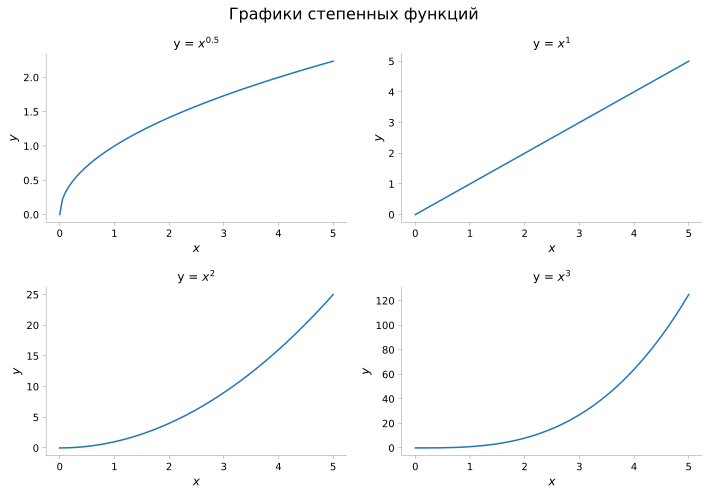

In [198]:
degrees = [0.5, 1, 2, 3] # степени
x = np.linspace(0, 5, num=101) # массив абсцисс
f = lambda x, n: x**n # степенная функция

fig, ax = plt.subplots(2, 2, figsize=(10, 7)) # Создали рисунок с 2 x 2 подграфиками


for index, n in enumerate(degrees):  # Нам нужен порядковый номер функции, чтобы выбрать подграфик
    row = index // 2 # строка в сетке подграфиков
    col = index % 2 # столбец в сетке подграфиков
    a = ax[row, col] # выбираем текущий подграфик
        
    a.plot(x, f(x, n), label=f'$y = x^{{{n}}}$')
    a.set_title(f'y = $x^{{{n}}}$')
    a.set_xlabel('$x$', fontsize=12)
    a.set_ylabel('$y$', fontsize=12)
    
    # поработаем над видом осей
    # делаем правую и верхнюю границу графика невидимыми    
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)

    
    # уменьшаем толщину оставшихся границ графика с помощью цикла 
    # (можно и без цикла отдельной строкой для каждой границы, как делали выше)
    for s in ['bottom','left']:
        a.spines[s].set_linewidth(0.2)    
    
    # делаем засечки на шкалах x и y потоньше
    a.xaxis.set_tick_params(width=0.2)
    a.yaxis.set_tick_params(width=0.2)


plt.suptitle('Графики степенных функций', fontsize=16) # Общий заголовок рисунка
plt.tight_layout() # Распределить подграфики внутри рисунка, чтобы они не накладывались
plt.show()

## Дополнительные ресурсы

- [Введение в pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
- Глава 9 книги Уэса Маккини Python и анализ данных, 2-е издание
- Галерея matplotlib http://matplotlib.org/gallery.html
- Python scientific lecture notes https://scipy-lectures.github.io/


Примеры кода из Интернет можно загружать с помощью волшебной команды `%load`

Пусть, необходимо построить график, похожий на такой:  
![Полярный график](http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_bar_demo.png)
http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html


Для получения шаблона кода достаточно скопировать ссылку на исходный код (.py) на странице примера и указать эту ссылку в команде `%load`: